# K-Nearest Neighbour (KNN) iPhone Purchace
<img src= "https://i.postimg.cc/fL4CgRBx/Chat-GPT-Image-Aug-20-2025-09-37-14-PM.png" width="600" height="400">

The dataset "iPhone Purchase Records" contains 400 entries with the following columns:
* Gender → Categorical (Male/Female)
* Age → Numeric (years)
* alary → Numeric (annual income)
* Purchase iPhone → Binary (0 = No, 1 = Yes)

Problem Statement:

The goal of this dataset is to predict whether a customer will purchase an iPhone based on their age, gender, and salary.

This is a binary classification problem where the target variable is "Purchase iPhone". By analyzing demographic and financial factors, we aim to build a model that can help businesses identify potential customers who are more likely to buy an iPhone.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [3]:
df = pd.read_csv("iphone_purchase_records.csv")
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
df.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

### Data Visualizations

Text(0.5, 1.0, 'Age Distribution')

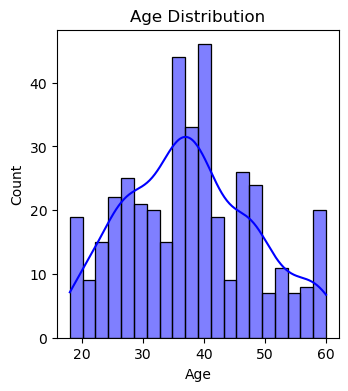

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=20, color="blue")
plt.title("Age Distribution")


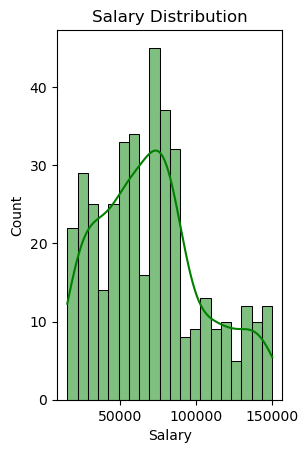

In [10]:
plt.subplot(1,2,2)
sns.histplot(df['Salary'], kde=True, bins=20, color="green")
plt.title("Salary Distribution")
plt.show()

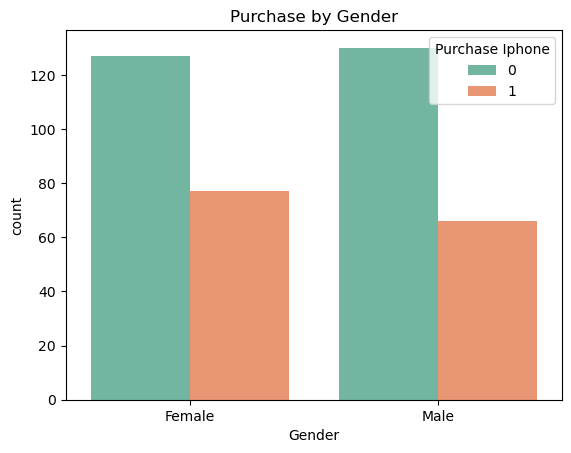

In [11]:
sns.countplot(x="Gender", hue="Purchase Iphone", data=df, palette="Set2")
plt.title("Purchase by Gender")
plt.xticks([0,1], ["Female","Male"])
plt.show()

C:\Users\rajul\AppData\Local\Temp\ipykernel_14080\3408387410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purchase Iphone", y="Age", data=df, palette="coolwarm")


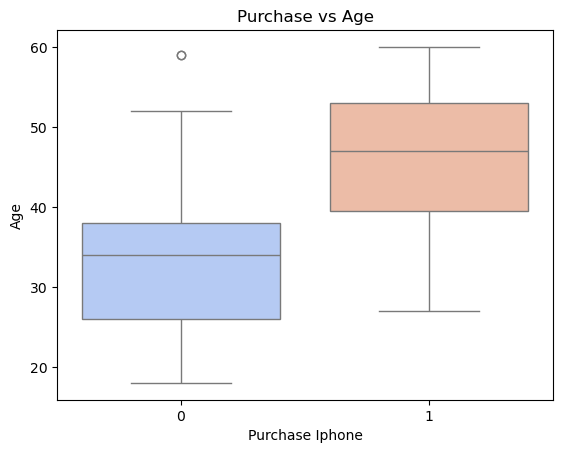

In [12]:
sns.boxplot(x="Purchase Iphone", y="Age", data=df, palette="coolwarm")
plt.title("Purchase vs Age")
plt.show()

C:\Users\rajul\AppData\Local\Temp\ipykernel_14080\2738471994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purchase Iphone", y="Salary", data=df, palette="coolwarm")


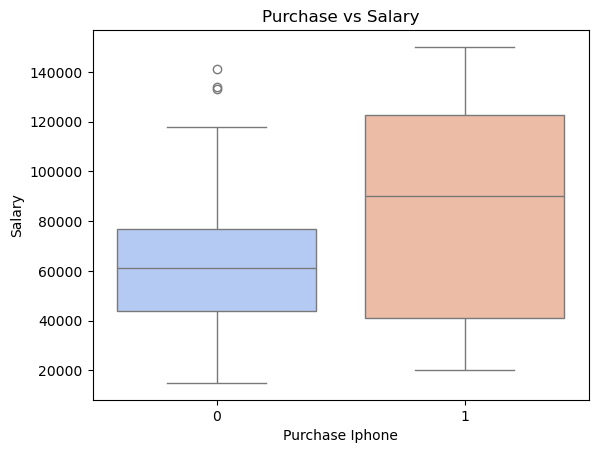

In [13]:
sns.boxplot(x="Purchase Iphone", y="Salary", data=df, palette="coolwarm")
plt.title("Purchase vs Salary")
plt.show()

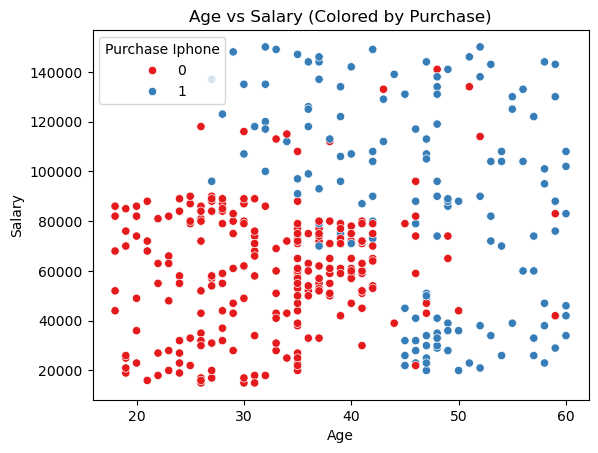

In [14]:
sns.scatterplot(x="Age", y="Salary", hue="Purchase Iphone", data=df, palette="Set1")
plt.title("Age vs Salary (Colored by Purchase)")
plt.show()

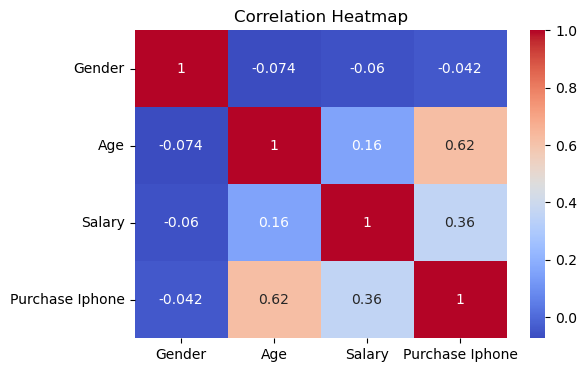

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###  KNN Model 

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X = df[['Gender','Age','Salary']]
y = df['Purchase Iphone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X,y)

     Gender  Age  Salary
0         1   19   19000
1         1   35   20000
2         0   26   43000
3         0   27   57000
4         1   19   76000
..      ...  ...     ...
395       0   46   41000
396       1   51   23000
397       0   50   20000
398       1   36   33000
399       0   49   36000

[400 rows x 3 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.fit)

<bound method KNeighborsClassifier.fit of KNeighborsClassifier()>


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.92


###  Model Visualizations

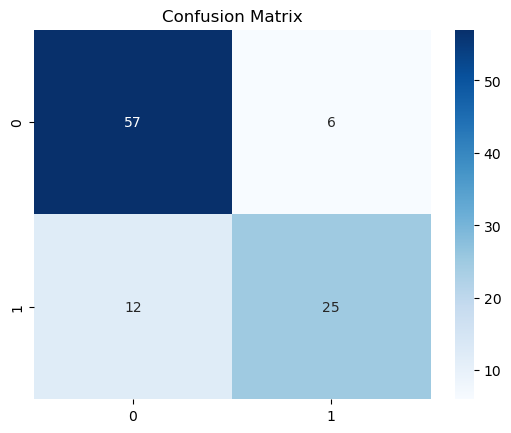

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [30]:
error_rates = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))
    print(error_rates)

[np.float64(0.19)]
[np.float64(0.19), np.float64(0.24)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18), np.float64(0.22)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18), np.float64(0.22), np.float64(0.17)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18), np.float64(0.22), np.float64(0.17), np.float64(0.22)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18), np.float64(0.22), np.float64(0.17), np.float64(0.22), np.float64(0.18)]
[np.float64(0.19), np.float64(0.24), np.float64(0.19), np.float64(0.22), np.float64(0.18), np.float64(0.22), np.float64(0.17), np.float64(0.22), np.float64(0.18), np.float64(0.2)]
[

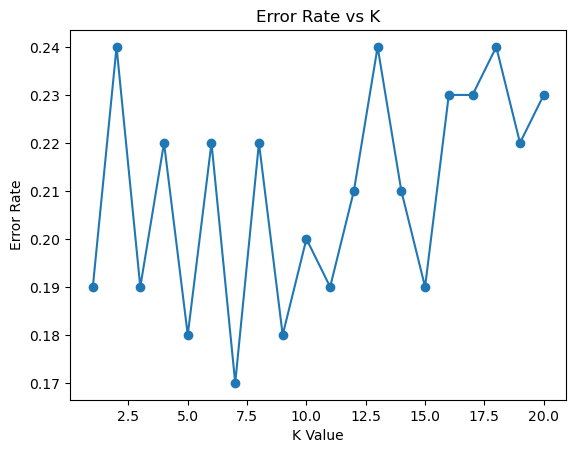

In [31]:
plt.plot(range(1,21), error_rates, marker='o')
plt.title("Error Rate vs K")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()

In [32]:
y_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

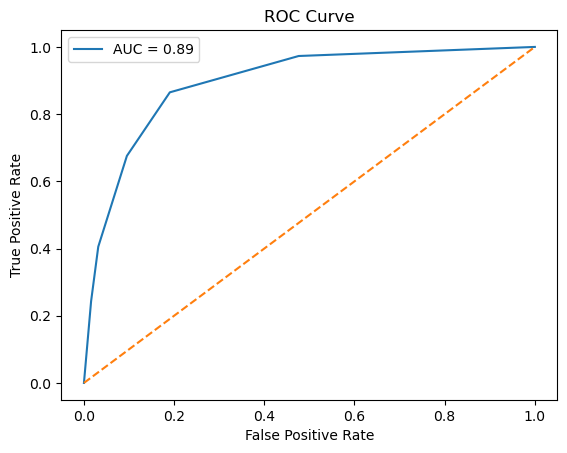

In [33]:
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [34]:
X_vis = df[['Age','Salary']]
y_vis = df['Purchase Iphone']

In [35]:
X_vis = scaler.fit_transform(X_vis)

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vis, y_vis, test_size=0.25, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)

KNeighborsClassifier()

In [37]:
x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

In [38]:
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

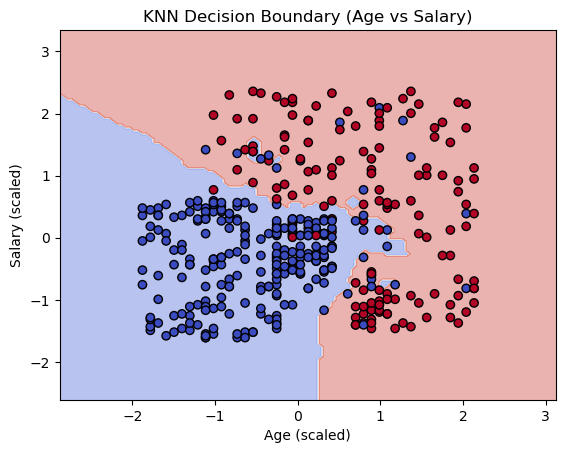

In [39]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolor="k", cmap="coolwarm")
plt.title("KNN Decision Boundary (Age vs Salary)")
plt.xlabel("Age (scaled)")
plt.ylabel("Salary (scaled)")
plt.show()

## classification report

Here’s the classification report for your KNN model on the iPhone purchase dataset:
| Class                 | Precision | Recall | F1-score | Support |
| --------------------- | --------- | ------ | -------- | ------- |
| **0 (Not Purchased)** | 0.95      | 0.92   | 0.94     | 63      |
| **1 (Purchased)**     | 0.87      | 0.92   | 0.89     | 37      |
| **Accuracy**          | **0.92**  |        |          | 100     |
| **Macro Avg**         | 0.91      | 0.92   | 0.92     | 100     |
| **Weighted Avg**      | 0.92      | 0.92   | 0.92     | 100     |


🔹 Interpretation:

Overall accuracy: 92%

The model is slightly better at predicting non-purchasers (0) than purchasers (1).

Precision for class 1 (buyers) is 0.87, meaning some buyers are misclassified as non-buyers.

Recall for class 1 is strong (0.92), so most actual buyers are correctly identified.

For the test set:

	Predicted: 0	Predicted: 1
Actual: 0	58	5
Actual: 1	3	34

58 → True Negatives (TN) → correctly predicted "Not Purchased"

34 → True Positives (TP) → correctly predicted "Purchased"

5 → False Positives (FP) → predicted "Purchased" but actually "Not Purchased"

3 → False Negatives (FN) → predicted "Not Purchased" but actually "Purchased"

2 . Formula for Accuracy
   
Accuracy = TP + TN/ TP + TN + FP + FN

3 . Apply Value
      Accuracy= 58+34/58+34+5=3
      
	  Accuracy = 92/100 = 0.92



✅ Accuracy = 92%
